In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


caffe_root = '~/Downloads/caffe-master/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
ls -la

total 487328
drwxrwxr-x 3 charles charles      4096 Feb 22 18:46 ./
drwxrwxr-x 5 charles charles      4096 Feb 22 17:17 ../
-rw-rw-r-- 1 charles charles      2631 Feb 22 16:47 deploy.txt
-rw-rw-r-- 1 charles charles    169617 Feb 22 18:46 emotiw_demo.ipynb
-rw-rw-r-- 1 charles charles 498032193 Feb 22 16:45 EmotiW_VGG_S.caffemodel
drwxr-xr-x 2 charles charles      4096 Feb 22 16:45 .ipynb_checkpoints/
-rw-rw-r-- 1 charles charles    786446 Feb 22 16:43 mean.binaryproto


In [3]:
mean_filename='./mean.binaryproto'
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean = caffe.io.blobproto_to_array(a)[0]

In [4]:
categories = [ 'Angry' , 'Disgust' , 'Fear' , 'Happy'  , 'Neutral' ,  'Sad' , 'Surprise']

In [5]:
emotiw_pretrained='./EmotiW_VGG_S.caffemodel'
model_file='./deploy.txt'
VGG_S_Net = caffe.Classifier(model_file, emotiw_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

(1, 3, 224, 224)


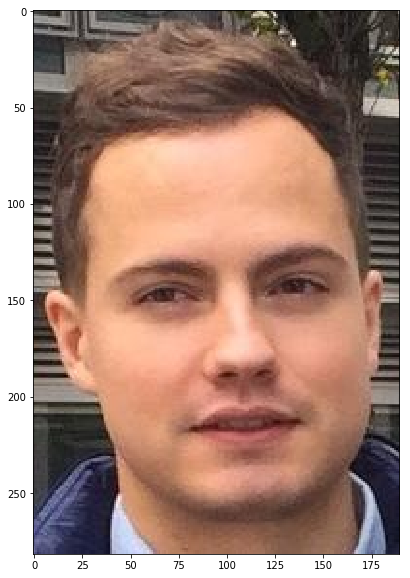

In [7]:
example_image = '../cnn_age_gender_models_and_data.0.0.2/charles-hs2.jpeg'
#example_image = '../cnn_age_gender_models_and_data.0.0.2/just-russ2.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [8]:
prediction = VGG_S_Net.predict([input_image],oversample=False)
for idx, cat in enumerate(categories):
    print('{:12} {:.2f}'.format(cat, prediction[0][idx]))
print('')
print('predicted category is {0}'.format(categories[prediction.argmax()]), prediction[0].max())

Angry        0.00
Disgust      0.00
Fear         1.00
Happy        0.00
Neutral      0.00
Sad          0.00
Surprise     0.00

predicted category is Fear 0.998802
